In [1]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F

In [2]:
# Basic use of Modules
# 1. Define a class that encapsulates the parameters and the forward pass
# 2. Define an optimizer
# 3. Compute the loss function value
# 4. Use auto differentiation to compute gradients
# 5. Update parameters
x = torch.tensor([[0.0, 0.0],
                  [0.0, 1.0],
                  [1.0, 0.0],
                  [1.0, 1.0]])
y = torch.tensor([[0.0],
                  [1.0],
                  [1.0],
                  [0.0]])

n = x.shape[0]
p = x.shape[1]
d = y.shape[1]
r = 5

class MyModel(nn.Module):
    def __init__(self, in_dim, out_dim, hidden_dim):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(in_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, out_dim)

    def forward(self, x):
        z1 = self.fc1(x)
        a1 = F.softplus(z1)
        z2 = self.fc2(a1)
        phat = torch.sigmoid(z2)
        return phat

def get_losses(OptClass, nepoch=1000, lr=0.1):
    model = MyModel(in_dim=p, out_dim=d, hidden_dim=r)
    opt = OptClass(model.parameters(), lr=lr)
    losses = []
    
    for i in range(nepoch):
        phat = model(x)
        loss = torch.mean(-y * torch.log(phat) - (1.0 - y) * torch.log(1.0 - phat))

        opt.zero_grad()
        loss.backward()
        opt.step()
        
        losses.append(loss.item())

    return losses

In [3]:
nepoch = 2000
lr = 0.1

np.random.seed(123)
torch.random.manual_seed(123)
losses_sgd = get_losses(torch.optim.SGD, nepoch, lr)

np.random.seed(123)
torch.random.manual_seed(123)
losses_adagrad = get_losses(torch.optim.Adagrad, nepoch, lr)

np.random.seed(123)
torch.random.manual_seed(123)
losses_adadelta = get_losses(torch.optim.Adadelta, nepoch, lr)

np.random.seed(123)
torch.random.manual_seed(123)
losses_rmsprop = get_losses(torch.optim.RMSprop, nepoch, lr)

np.random.seed(123)
torch.random.manual_seed(123)
losses_adam = get_losses(torch.optim.Adam, nepoch, lr)

,x,sgd,adagrad,adadelta,rmsprop,adam,sgd_log,adagrad_log,adadelta_log,rmsprop_log,adam_log
0,0,0.693664,0.693664,0.693664,0.693664,0.693664,-0.365768,-0.365768,-0.365768,-0.365768,-0.365768
1,1,0.693261,0.699535,0.693610,3.349150,0.699535,-0.366349,-0.357339,-0.365845,1.208706,-0.357339
2,2,0.692907,0.688875,0.693557,0.686502,0.688469,-0.366860,-0.372695,-0.365922,-0.376146,-0.373285
3,3,0.692595,0.685253,0.693503,0.671508,0.683866,-0.367310,-0.377968,-0.366000,-0.398229,-0.379994
4,4,0.692321,0.682598,0.693449,0.656235,0.683191,-0.367706,-0.381850,-0.366078,-0.421236,-0.380980
...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,0.052994,0.004366,0.127950,NaN,0.000041,-2.937571,-5.433921,-2.056113,NaN,-10.111537
1996,1996,0.052896,0.004364,0.127658,NaN,0.000041,-2.939436,-5.434470,-2.058402,NaN,-10.112271
1997,1997,0.052797,0.004361,0.127366,NaN,0.000041,-2.941299,-5.435020,-2.060690,NaN,-10.113373
1998,1998,0.052699,0.004359,0.127075,NaN,0.000041,-2.943160,-5.435577,-2.062977,NaN,-10.114109


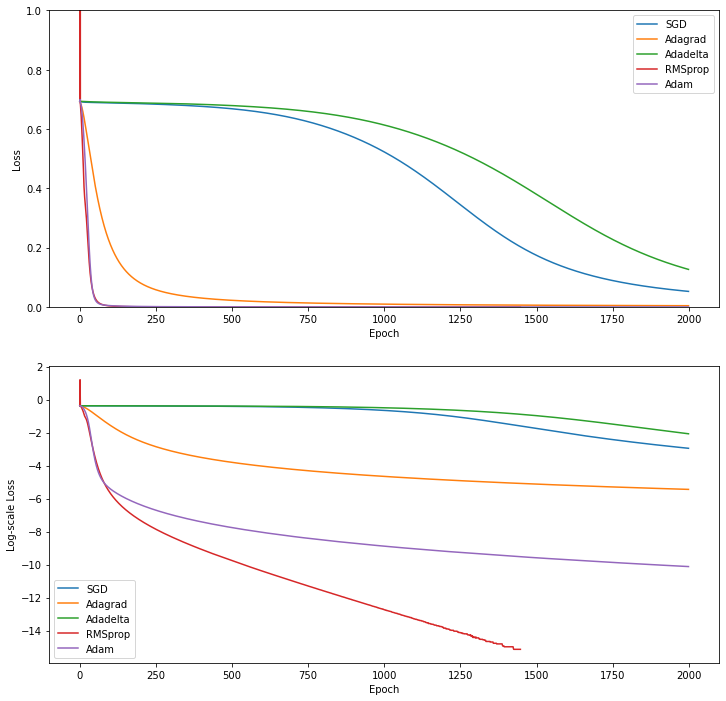

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dat = pd.DataFrame({"x": range(nepoch), "sgd": losses_sgd, "adagrad": losses_adagrad,
                    "adadelta": losses_adadelta, "rmsprop": losses_rmsprop, "adam": losses_adam,
                    "sgd_log": np.log(losses_sgd), "adagrad_log": np.log(losses_adagrad),
                    "adadelta_log": np.log(losses_adadelta), "rmsprop_log": np.log(losses_rmsprop),
                    "adam_log": np.log(losses_adam)})

fig = plt.figure(figsize=(12, 12))
sub = fig.add_subplot(211)
sns.lineplot(data=dat, x="x", y="sgd", label="SGD")
sns.lineplot(data=dat, x="x", y="adagrad", label="Adagrad")
sns.lineplot(data=dat, x="x", y="adadelta", label="Adadelta")
sns.lineplot(data=dat, x="x", y="rmsprop", label="RMSprop")
sns.lineplot(data=dat, x="x", y="adam", label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0, 1)

sub = fig.add_subplot(212)
sns.lineplot(data=dat, x="x", y="sgd_log", label="SGD")
sns.lineplot(data=dat, x="x", y="adagrad_log", label="Adagrad")
sns.lineplot(data=dat, x="x", y="adadelta_log", label="Adadelta")
sns.lineplot(data=dat, x="x", y="rmsprop_log", label="RMSprop")
sns.lineplot(data=dat, x="x", y="adam_log", label="Adam")
plt.xlabel("Epoch")
plt.ylabel("Log-scale Loss")

dat